In [10]:
%load_ext autoreload
%autoreload 2

Font size is set to 10
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os, sys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import geopandas as gpd
import h3pandas 
sys.path.append('../../../reproducible_figures/scripts/')
import rep_fig_vis as rfv
sys.path.append('../../scripts/')
import create_dataset_utils as cdu
sys.path.append('../../../cnn-land-cover/scripts/')
import land_cover_analysis as lca 
import land_cover_visualisation as lcv

sys.path.append('../../scripts/')
import create_dataset_utils as cdu
import paired_embeddings_models as pem
import data_vis_utils as dvu
import shapely
from tqdm import tqdm, tqdm_notebook
import os
import pandas as pd

In [3]:
df = cdu.load_df_gbif()

/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/dwca/read.py:203: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(self.absolute_temporary_path(relative_path), **kwargs)


Loaded GBIF dataset with 8165207 records


In [6]:
print(df.columns)

Index(['id', 'accessRights', 'bibliographicCitation', 'language', 'license',
       'modified', 'publisher', 'references', 'rightsHolder', 'type',
       ...
       'level0Name', 'level1Gid', 'level1Name', 'level2Gid', 'level2Name',
       'level3Gid', 'level3Name', 'iucnRedListCategory', 'eventType',
       'geodeticDatum'],
      dtype='object', length=213)


In [9]:
df['rightsHolder'].unique()

array(['UKBMS'], dtype=object)

In [17]:
full_df = df.copy()

In [37]:
df = full_df.copy()

In [9]:
for c in df.columns:
    print(c, df[c].dtype, df[c].nunique(), df[c].iloc[:4].values, '\n')

id int64 8165207 [3354397317 2913986753 2910646939 2918440483] 

accessRights float64 0 [nan nan nan nan] 

bibliographicCitation float64 0 [nan nan nan nan] 

language float64 0 [nan nan nan nan] 

license object 1 ['CC_BY_4_0' 'CC_BY_4_0' 'CC_BY_4_0' 'CC_BY_4_0'] 

modified float64 0 [nan nan nan nan] 

publisher object 1 ['UK Butterfly Monitoring Scheme' 'UK Butterfly Monitoring Scheme'
 'UK Butterfly Monitoring Scheme' 'UK Butterfly Monitoring Scheme'] 

references float64 0 [nan nan nan nan] 

rightsHolder object 1 ['UKBMS' 'UKBMS' 'UKBMS' 'UKBMS'] 

type float64 0 [nan nan nan nan] 

institutionID float64 0 [nan nan nan nan] 

collectionID float64 0 [nan nan nan nan] 

datasetID float64 0 [nan nan nan nan] 

institutionCode object 1 ['UKBMS' 'UKBMS' 'UKBMS' 'UKBMS'] 

collectionCode float64 0 [nan nan nan nan] 

datasetName float64 0 [nan nan nan nan] 

ownerInstitutionCode float64 0 [nan nan nan nan] 

basisOfRecord object 1 ['HUMAN_OBSERVATION' 'HUMAN_OBSERVATION' 'HUMAN_OBSERV

In [39]:
df = df[df.year.isin([2018, 2019])]
print(df.footprintWKT.nunique(), df.year.unique(), len(df))


1804 [2019 2018] 1117312


In [32]:
# df_mapping_locs = cdu.create_names_unique_locs(df, save_json=True)
df_mapping_locs, df = cdu.load_names_unique_locs(df=df)
print(df.footprintWKT.nunique(), df.year.unique(), len(df))
# df = df[df.tuple_coords.isin(df_mapping_locs.tuple_coords)]  # remove entries where there multiple pairs of coordinates & polygons
# print(df.footprintWKT.nunique(), df.year.unique(), len(df))


1804 [2019 2018] 1117312


In [25]:
# df.iloc[0].tuple_coords, df.iloc[0].decimalLongitude, df.iloc[0].decimalLatitude, df.iloc[0].footprintWKT
df_mapping_locs

,tuple_coords,footprintWKT,count,name_loc
0,"(-2.165105, 50.956811)","POLYGON((-2.17221 50.9523,-2.17221 50.96132,-2...",53410,UKBMS_loc-0000
1,"(-2.646667, 50.775285)","POLYGON((-2.6537 50.77075,-2.6537 50.77982,-2....",51809,UKBMS_loc-0001
2,"(-0.828484, 50.888106)","POLYGON((-0.8357 50.88368,-0.8357 50.89253,-0....",48596,UKBMS_loc-0002
3,"(-1.966038, 50.59722)","POLYGON((-1.97311 50.59273,-1.97311 50.60171,-...",46522,UKBMS_loc-0003
4,"(-0.22994099999999998, 52.409243)","POLYGON((-0.23747 52.40486,-0.23747 52.41363,-...",44130,UKBMS_loc-0004
...,...,...,...,...
2567,"(-3.582874, 51.197997)","POLYGON((-3.58987 51.19341,-3.58987 51.20259,-...",3,UKBMS_loc-2565
2568,"(-1.861307, 52.557257)","POLYGON((-1.8687 52.55277,-1.8687 52.56174,-1....",2,UKBMS_loc-2566
2569,"(-4.464948, 52.162981)","POLYGON((-4.472 52.15834,-4.472 52.16762,-4.45...",2,UKBMS_loc-2567
2571,"(1.525796, 52.666701)","POLYGON((1.51806 52.66243,1.51806 52.67097,1.5...",1,UKBMS_loc-2568


Unique number of points 1804 out of 1117312


12it [00:07,  1.53it/s]


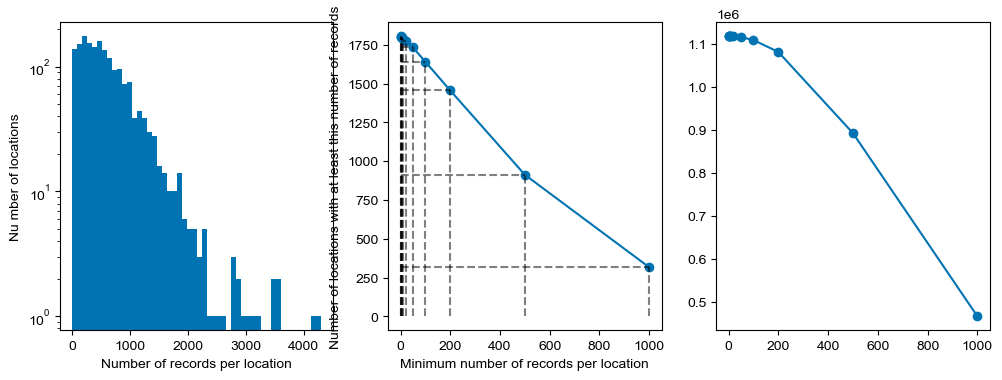

In [44]:
tmp_df_obs = cdu.plot_obs_per_location(df)

In [53]:
print(f'Median: {np.median(tmp_df_obs.values)}')
print(f'Mean: {np.mean(tmp_df_obs.values)}')
print(f'Min: {np.min(tmp_df_obs.values)}')
print(f'Max: {np.max(tmp_df_obs.values)}')
print(f'Std dev: {np.std(tmp_df_obs.values)}')
print(f'IQR: {np.percentile(tmp_df_obs.values, 75) - np.percentile(tmp_df_obs.values, 25)}')
print(f'half iQR: {(np.percentile(tmp_df_obs.values, 75) - np.percentile(tmp_df_obs.values, 25)) / 2}')
print(f'25th percentile: {np.percentile(tmp_df_obs.values, 25)}')
print(f'75th percentile: {np.percentile(tmp_df_obs.values, 75)}')


Median: 505.5
Mean: 619.3525498891353
Min: 1
Max: 4297
Std dev: 513.2149179276847
IQR: 597.25
half iQR: 298.625
25th percentile: 253.0
75th percentile: 850.25


In [34]:
df_clean = cdu.clean_bms_data(df, threshold_n_obs_per_location=200)

Kept 1081065 records at locations with at least 200 observations
Unique number of locations 1455 out of 1117312


In [36]:
df_clean.species.nunique()

62

In [ ]:
df_minimal = cdu.create_minimal_df_bms(df_clean)
df_minimal.head(2)

,footprintWKT,eventDate,year,month,day,species,speciesKey,tuple_coords,polygon
0,"POLYGON((-2.86173 52.80142,-2.86173 52.81052,-...",2009-07-12T00:00:00,2009,7,12,Pieris napi,1920494,"(52.805971, -2.854403)","POLYGON ((-2.86173 52.80142, -2.86173 52.81052..."
1,"POLYGON((-0.13677 51.29729,-0.13677 51.30605,-...",1998-07-07T00:00:00,1998,7,7,Coenonympha pamphilus,1911461,"(51.301673, -0.129423)","POLYGON ((-0.13677 51.29729, -0.13677 51.30605..."


In [ ]:
df_summary, species_list = cdu.create_species_presence_per_loc_and_date(df_minimal)
df_summary.head(2)

Unique number of species 71
Number of location/date combis 418264


,tuple_coords,eventDate,Pieris napi,Coenonympha pamphilus,Aglais urticae,Maniola jurtina,Aphantopus hyperantus,Vanessa cardui,Thymelicus sylvestris,Pieris rapae,...,Carterocephalus palaemon,Melitaea cinxia,Scotopteryx bipunctaria,Colias alfacariensis,Colias hyale,Nymphalis polychloros,Lampides boeticus,Danaus plexippus,Anarta myrtilli,Pontia daplidice
0,"(49.969258, -6.289845)",2012-05-11T00:00:00,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,"(49.969258, -6.289845)",2012-05-16T00:00:00,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Number of clusters 12


/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


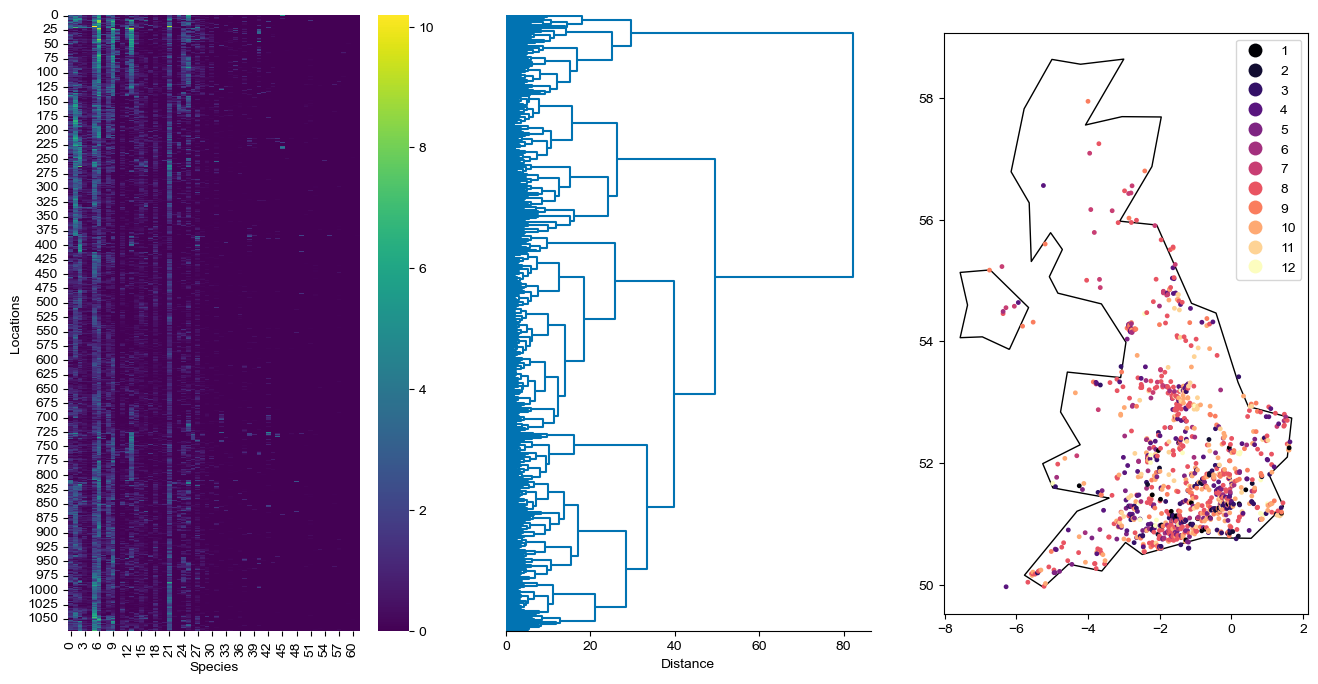

In [ ]:
cdu.plot_clusters_species_per_loc(df_summary, species_list)

In [122]:
df_mapping_locs, df = cdu.load_names_unique_locs(df=df)

In [139]:
df_per_loc, df_summary, species_list = cdu.create_species_dataset(df=df,
                            dataset_type='presence',
                            year_max=2019, year_min=2018, threshold_n_obs_per_location=200,
                            save_csv=True)

-- Starting to create species dataset. Copying.
-- Creating new data set from 8165207 records.
-- Getting locations.
-- Loaded 2570 unique locations.
-- Filtering by year.
-- Kept 1117312 records after filtering by year.
-- Cleaning data.
Kept 1081065 records at locations with at least 200 observations
Unique number of locations 1455 out of 1117312
-- Aggregating data to presence.
Unique number of species 62
Number of location/date combis 58690


/Users/t.vanderplas/repos/PECL/notebooks/try-out/../../scripts/create_dataset_utils.py:203: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_presence[species_list] = df_presence[species_list].applymap(lambda x: 1 if x > 0 else 0)  # presence/absence


-- Matching locations coordinates to names.
-- Created data set with 1455 locations and 62 species.
-- Saving data.
-- Done.


In [137]:
df_per_loc = cdu.load_species_dataset()

In [138]:
df_per_loc.head(2)  

,tuple_coords,Melanargia galathea,Pieris napi,Aphantopus hyperantus,Aglais io,Polyommatus icarus,Vanessa atalanta,Lycaena phlaeas,Pararge aegeria,Gonepteryx rhamni,...,Tyria jacobaeae,Euclidia glyphica,Odezia atrata,Melitaea cinxia,Carterocephalus palaemon,Nymphalis polychloros,Nymphalis antiopa,Erebia epiphron,n_visits,name_loc
0,"(-7.824283, 54.259247)",0.0,0.696970,0.242424,0.333333,0.272727,0.060606,0.121212,0.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,UKBMS_loc-1044
1,"(-7.457325, 54.15933)",0.0,0.419355,0.387097,0.354839,0.000000,0.064516,0.000000,0.870968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,UKBMS_loc-1420


## get GEE sentinel image

In [ ]:
import ee, geemap 

ee.Authenticate()
ee.Initialize(project='ee-biodiv-mon')
geemap.ee_initialize()

In [ ]:
Map = geemap.Map()

vis_params = {'min': 0, 'max': 3000}

# Map.centerObject(ex_im_gee, 8)
# Map.addLayer(ex_im_gee, vis_params)

point = ee.Geometry.Point(df_clean.iloc[0].tuple_coords[::-1])
Map.addLayer(point, {}, 'point')

fc = ee.FeatureCollection(aoi)
style = {'color': 'ffff00ff', 'fillColor': '00000000'}
Map.addLayer(fc.style(**style), {}, 'ROI')

# ## add point:
# Map.addLayer(point, {}, 'point')

Map


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

# Download all BMS images per year

In [ ]:
year = 2018
n_it = len(df_mapping_locs)
count_im_failed = 0
for ii in tqdm_notebook(range(n_it)):
    row = df_mapping_locs.iloc[ii]
    _ = cdu.download_gee_image(df_mapping_locs_row=row, year=year, 
                                verbose=0)
    if _[0] is None:
        count_im_failed += 1

/var/folders/vg/lgb0bh9x2yx0ny2lk_h8_ylc0000gr/T/ipykernel_99851/1517871281.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ii in tqdm_notebook(range(n_it)):


  0%|          | 0/2570 [00:00<?, ?it/s]

Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0000_y-2018_m-06-09.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0001_y-2018_m-06-09.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0002_y-2018_m-06-09.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0003_y-2018_m-06-09.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0004_y-2018_m-06-09.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09/sent2-4band_UKBMS_loc-0005_y-2018_m-06-09.tif
Generating

In [ ]:
import shapely 
point = df_clean.iloc[0].tuple_coords
point = shapely.geometry.Point(point)
pol = point.buffer(0.01, cap_style=3)
pol_2 = df_clean.iloc[0].polygon
# pol.area
for p in [pol, pol_2]:
    print(p.area)
    print(p.bounds)
    print(ee.Geometry.Polygon(np.array(p.exterior.coords.xy).T.tolist()).area().getInfo())
    print('--')

# ee.Geometry.Point(point).buffer(ee.Number(1e3), 1)#.bounds().exterior.coords.xy
# point.buffer(ee.Number(1e6).sqrt().divide(2), 1).bounds()

0.00039999999999992076
(-1.66114, 51.135244, -1.64114, 51.155243999999996)
3102699.0097114746
--
0.00012852199999998043
(-1.65832, 51.14077, -1.64396, 51.14972)
996912.6917840142
--


In [ ]:
tmp = cdu.download_gee_image(df_mapping_locs_row=df_mapping_locs.iloc[0],
                             year=2018,
                             verbose=1)

{'type': 'Projection', 'crs': 'EPSG:32630', 'transform': [10, 0, 499980, 0, -10, 5700000]}
Pixel dimensions: [305, 305]
{'id': 'B8', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [305, 305], 'origin': [5713, 5312], 'crs': 'EPSG:32630', 'crs_transform': [10, 0, 499980, 0, -10, 5700000]}
Generating URL ...
Please wait ...
Data downloaded to /Users/t.vanderplas/data/UKBMS_sent2_ds/sentinel2_4band/sent2-4band_UKBMS_loc-0000_y-2018_m-06-09.tif
Original size:  (4, 305, 305)
New size:  (4, 256, 256)


(4, 256, 256) <class 'xarray.core.dataarray.DataArray'>
Percentage non-zero: 1.0


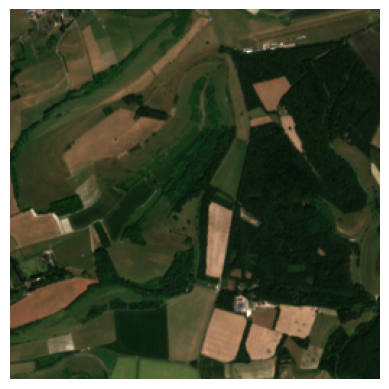

In [ ]:
# filepath = 'sentinel2_example.tif'
filepath = tmp[1]
im_loaded = lca.load_tiff(filepath, datatype='da')
## normalise by clipping to 3000 and dividing by 3000/255
im_loaded = np.clip(im_loaded, 0, 3000)
im_loaded = im_loaded / (3000)
# im_loaded = im_loaded[:3, ...]
print(im_loaded.shape, type(im_loaded))
perc_non_zero = np.sum(im_loaded != 0) / np.prod(im_loaded.shape)
print(f'Percentage non-zero: {perc_non_zero.values}')

im_plot = im_loaded[:3, ...]
# im_plot = im_loaded[:3, ...]
assert im_plot.shape == (3, 256, 256), im_plot.shape
# assert np.sum(im_plot == 0) == 0

lcv.plot_image_simple(im_plot)
# lcv.plot_image_simple(im_loaded[:3, ...])

# Create mixed data set
- Create new folder
- Loop through all loc_names
    - If 2019 present, use 2019
    - Else, use 2018 (if present)
- Look through all by hand (save all?)
    - If cloud or missing, note down name. 
    - Delete file
- For all corrupted data;
    - If 2018, nothing can be done.
    - If 2019, check 2018. If good copy, copy in. 

In [3]:
df_presence_full = pd.read_csv('/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                               index_col=0)

assert len(df_presence_full.name_loc.unique()) == len(df_presence_full)
print(f'Number of unique locations: {len(df_presence_full)}')

df_presence_full.head(2)

Number of unique locations: 1455


,tuple_coords,Melanargia galathea,Pieris napi,Aphantopus hyperantus,Aglais io,Polyommatus icarus,Vanessa atalanta,Lycaena phlaeas,Pararge aegeria,Gonepteryx rhamni,...,Tyria jacobaeae,Euclidia glyphica,Odezia atrata,Melitaea cinxia,Carterocephalus palaemon,Nymphalis polychloros,Nymphalis antiopa,Erebia epiphron,n_visits,name_loc
0,"(-7.824283, 54.259247)",0.0,0.696970,0.242424,0.333333,0.272727,0.060606,0.121212,0.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,UKBMS_loc-1044
1,"(-7.457325, 54.15933)",0.0,0.419355,0.387097,0.354839,0.000000,0.064516,0.000000,0.870968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,UKBMS_loc-1420


In [ ]:
ds = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2019/m-06-09/',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')

# im_inds = [27, 90, 176, 150, 155, 24]
folder_save = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/overview_images_2019/'
if not os.path.exists(folder_save):
    os.mkdir(folder_save)
# # k += 20
# k = 150
   
print(ds.suffix_images)
for k in range(0, len(ds), 20):
    print(k)
    im_inds = np.arange(k, k + 20)
    n_max_cols = 4 
    n_rows = int(np.ceil(len(im_inds) / n_max_cols))
    size_im = 3
    fig, ax = plt.subplots(n_rows, n_max_cols, figsize=(n_max_cols * size_im, n_rows * size_im))

    for i_plot, (ii, ax_) in enumerate(zip(im_inds, ax.flatten())):
        if ii < len(ds):
            ds.plot_image(index=ii, ax=ax_)

    for ax_ in ax.flatten():
        ax_.axis('off')

    assert False
    plt.savefig(folder_save + f'ukbms_overview_{k}-{k+19}.png')
    plt.close()


In [54]:
list_inds_2019_im_replace = [
    14, 19, 36, 43, 84, 90, 100, 121, 134, 143, 172, 177, 223, 245,
    263, 287, 315, 330, 346, 413, 436, 451, 481, 531, 538, 
    545, 593, 603, 612, 615, 635, 646, 647, 664, 686, 719, 736, 813,
    830, 842, 868, 940, 992, 1017, 1039, 1047, 1066, 1113,
    1130, 1132, 1179, 1213, 1216, 1218, 1221, 1229, 1239,
    1259, 1293, 1300, 1388, 1453, 1473, 1502, 1512, 1536,
    1555, 1573, 1628, 1668, 1697, 1709, 1800, 1886, 1900,
    1907, 2129, 2146, 2166
]
list_inds_2019_im_maybe_replace = [
    52, 68, 74, 78, 118, 163, 189, 293, 301, 319, 340, 389, 395,
    411, 505, 522, 551, 572, 573, 586, 602, 652, 708, 771, 777,
    831, 845, 848, 898, 964, 998, 1022, 1059, 1196, 1290, 1343, 1404, 
    1423, 1434, 1483, 1557, 1610, 1613, 1616, 1671, 1794, 1835, 
    1946, 1954, 2051, 
]


list_names_2019_im_replace = [f'UKBMS_loc-{str(ii).zfill(4)}' for ii in list_inds_2019_im_replace]
list_names_2019_im_maybe_replace = [f'UKBMS_loc-{str(ii).zfill(4)}' for ii in list_inds_2019_im_maybe_replace]

In [55]:
ds_2018 = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')

folder_save = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/overview_images_2018'
if not os.path.exists(folder_save):
    os.mkdir(folder_save)
assert os.path.exists(folder_save)
list_names_2018_not_present = []
print(ds_2018.suffix_images)
list_use = list_names_2019_im_replace + list_names_2019_im_maybe_replace
# list_use = list_names_2018_unique
for k in range(0, len(list_use), 20):
    im_names = list_use[k:k + 20]
    n_max_cols = 4 
    n_rows = int(np.ceil(len(im_names) / n_max_cols))
    size_im = 3
    fig, ax = plt.subplots(n_rows, n_max_cols, figsize=(n_max_cols * size_im, n_rows * size_im))

    for i_plot, (ii, ax_) in enumerate(zip(im_names, ax.flatten())):
        tmp = ds_2018.plot_image(index=None, loc_name=ii, ax=ax_)
        if tmp is None:
            list_names_2018_not_present.append(ii)
        
    for ax_ in ax.flatten():
        ax_.axis('off')

    # assert False
    plt.savefig(os.path.join(folder_save, f'ukbms_overview_2018_{k}-{k+19}.png'))
    plt.close()


Found 1333 out of 1455 images in the image folder.
Sorting data by name_loc.
['y-2018_m-06-09.tif']
Location UKBMS_loc-0090 not found in data set.
Location UKBMS_loc-0177 not found in data set.
Location UKBMS_loc-0736 not found in data set.
Location UKBMS_loc-0830 not found in data set.
Location UKBMS_loc-1130 not found in data set.
Location UKBMS_loc-1343 not found in data set.


In [56]:
list_names_2018_not_present.append('UKBMS_loc-1628')
list_names_2018_not_present

['UKBMS_loc-0090',
 'UKBMS_loc-0177',
 'UKBMS_loc-0736',
 'UKBMS_loc-0830',
 'UKBMS_loc-1130',
 'UKBMS_loc-1343',
 'UKBMS_loc-1628']

All other 2018 are cloud free! Great so, new data set will be:

- 2019 if not in either selection
-2018 if in selection and available
And then we'll miss out just 6

In [58]:
ds_2019 = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2019/m-06-09',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all', augment_image=False, mode='val')

list_names_2019 = ds_2019.df_presence.name_loc.unique()
list_replace = list_names_2019_im_replace + list_names_2019_im_maybe_replace


Found 1336 out of 1455 images in the image folder.
Sorting data by name_loc.


In [59]:
list_names_2018 = ds_2018.df_presence.name_loc.unique()
list_names_2018_unique = [name for name in list_names_2018 if name not in list_names_2019]
list_inds_2018_exclude = [188, 597, 1313]
list_names_2018_exclude = [f'UKBMS_loc-{str(ii).zfill(4)}' for ii in list_inds_2018_exclude]
list_names_2018_unique = [name for name in list_names_2018_unique if name not in list_names_2018_exclude]
len(list_names_2018_unique)

42

In [61]:
print(list_names_2018_not_present)
len(list_replace), len(list_names_2018_unique)

['UKBMS_loc-0090', 'UKBMS_loc-0177', 'UKBMS_loc-0736', 'UKBMS_loc-0830', 'UKBMS_loc-1130', 'UKBMS_loc-1343', 'UKBMS_loc-1628']


(129, 42)

In [62]:
import shutil 

folder_2018 = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2018/m-06-09'
folder_2019 = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/2019/m-06-09'
folder_merge = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/mix-2018-2019/m-06-09'

if not os.path.exists(folder_merge):
    os.makedirs(folder_merge)

for name in tqdm(list_names_2019):
    if name in list_names_2018_not_present:
        pass 
    elif name in list_replace or name in list_names_2018_unique:
        filename = f'sent2-4band_{name}_y-2018_m-06-09.tif'
        filepath = os.path.join(folder_2018, filename)
        assert os.path.exists(filepath), filepath
        new_filepath = os.path.join(folder_merge, filename)
        shutil.copyfile(filepath, new_filepath)
    else:
        filename = f'sent2-4band_{name}_y-2019_m-06-09.tif'
        filepath = os.path.join(folder_2019, filename)
        assert os.path.exists(filepath), filepath
        new_filepath = os.path.join(folder_merge, filename)
        shutil.copyfile(filepath, new_filepath)

100%|██████████| 1336/1336 [00:03<00:00, 391.90it/s]


In [63]:
print(f'Number of merged images: {len(os.listdir(folder_merge))}')
print(f'Number of 2018 images: {len(os.listdir(folder_2018))}')
print(f'Number of 2019 images: {len(os.listdir(folder_2019))}')

Number of merged images: 1329
Number of 2018 images: 2358
Number of 2019 images: 2347


In [64]:
ds_merged = pem.DataSetImagePresence(image_folder=folder_merge,
                                presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                                species_process='all', augment_image=False, mode='val')

Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.


In [65]:
ds_merge = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/mix-2018-2019/m-06-09',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')

folder_save = '/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/overview_images_mix-2018-2019'
if not os.path.exists(folder_save):
    os.mkdir(folder_save)
assert os.path.exists(folder_save)
print(ds_merge.suffix_images)
for k in tqdm(range(0, len(ds_merge), 20)):
    im_names = ds_merge.df_presence.name_loc[k:k + 20]
    n_max_cols = 4 
    n_rows = int(np.ceil(len(im_names) / n_max_cols))
    size_im = 3
    fig, ax = plt.subplots(n_rows, n_max_cols, figsize=(n_max_cols * size_im, n_rows * size_im))

    for i_plot, (ii, ax_) in enumerate(zip(im_names, ax.flatten())):
        tmp = ds_merge.plot_image(index=None, loc_name=ii, ax=ax_)
        assert tmp is not None, ii
        
    for ax_ in ax.flatten():
        ax_.axis('off')

    # assert False
    plt.savefig(os.path.join(folder_save, f'ukbms_overview_2018_{k}-{k+19}.png'))
    plt.close()


Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.
['y-2018_m-06-09.tif' 'y-2019_m-06-09.tif']


100%|██████████| 67/67 [02:11<00:00,  1.97s/it]


## Train test split

In [3]:
ds = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/mix-2018-2019/m-06-09/',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')



Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.


In [104]:
tmp = ds.split_and_save()

Splitting based on spatial clusters. This can take a little while.
Create 947 train, 196 val, 186 test indices.
Saved split indices to split_indices_2024-03-04-1831.pth


In [118]:
tmp = dvu.plot_data_split_stats()

Font size is set to 10
Number of training samples: 947, fraction: 0.71
Number of validation samples: 196, fraction: 0.15
Number of test samples: 186,   fraction: 0.14


Clusters with just 1 point: 586
Clusters with just at least 2 points: 230
Total number of points clustered in clusters with at least 2 points: 743


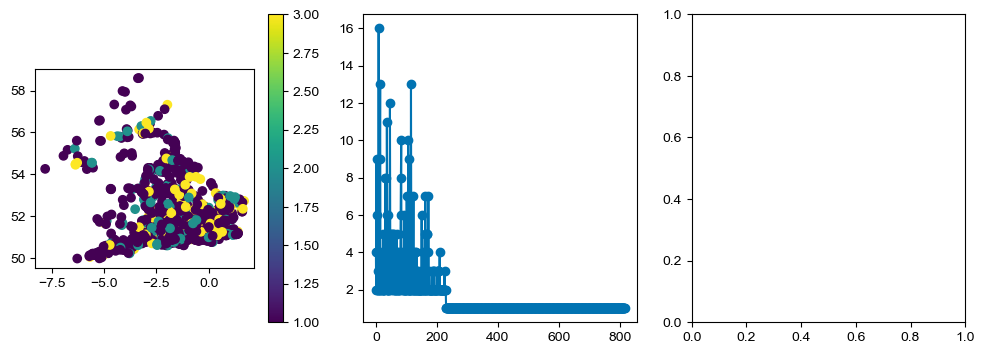

In [119]:
import ast
coords_points = [shapely.geometry.Point(ast.literal_eval(loc)) for loc in ds.df_presence.tuple_coords]

gdf = gpd.GeoDataFrame({'label': tmp[1], 'train': tmp[0]}, geometry=coords_points)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
gdf.plot(column='train', legend=True, ax=ax[0])

unique_labels = np.unique(tmp[1])
n_points_per_label = np.array([np.sum(tmp[1] == label) for label in unique_labels])
ax[1].plot(unique_labels, n_points_per_label, 'o-')

print(f'Clusters with just 1 point: {np.sum(n_points_per_label == 1)}')
print(f'Clusters with just at least 2 points: {np.sum(n_points_per_label >= 2)}')
print(f'Total number of points clustered in clusters with at least 2 points: {np.sum(n_points_per_label[n_points_per_label >= 2])}')

assert np.sum(n_points_per_label[n_points_per_label >= 2]) + np.sum(n_points_per_label == 1) == len(ds.df_presence)

# Figure data set

In [12]:
ds = pem.DataSetImagePresence(image_folder='/Users/t.vanderplas/data/UKBMS_sent2_ds/sent2-4band/mix-2018-2019/m-06-09/',
                              presence_csv='/Users/t.vanderplas/data/UKBMS_sent2_ds/bms_presence/bms_presence_y-2018-2019_th-200.csv',
                              species_process='all',
                              zscore_im=True, 
                              augment_image=False, mode='val')



Found 1329 out of 1455 images in the image folder.
Sorting data by name_loc.


In [13]:
all_labels = dvu.stack_all_labels(ds, normalise=True)[1]
# all_labels = all_labels[1]

or just use df presence?


100%|██████████| 1329/1329 [01:21<00:00, 16.35it/s]


/Users/t.vanderplas/anaconda3/envs/satbird/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Number of species: 62, number of labels: 1329
Inner product shape: (882456,)


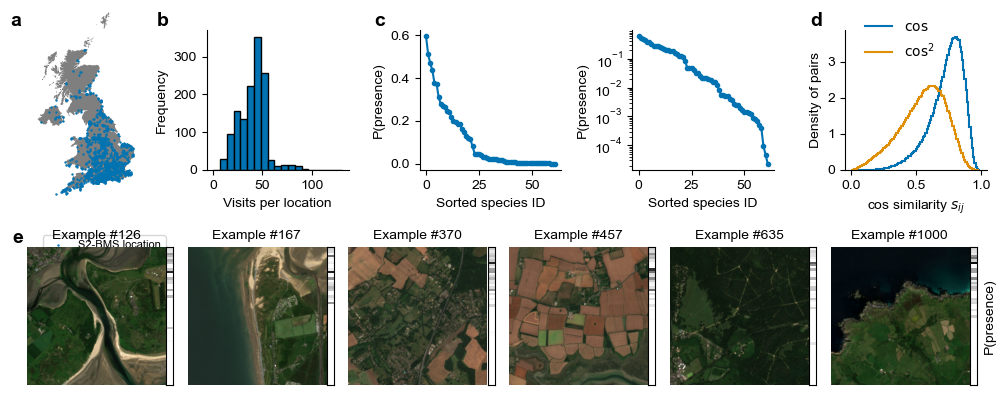

In [29]:
dvu.dataset_fig(ds=ds, save_fig=False, all_labels=all_labels, title_examples=True)



In [44]:
1329 * 1328 / 2

882456.0

Font size is set to 10
Number of species: 62, number of labels: 1329
Inner product shape: (882456,)


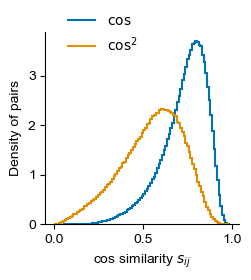

In [7]:
tmp = dvu.plot_distr_label_inner_prod(all_labels)


In [10]:
np.percentile(np.power(tmp[1], 2), 95)

0.8019688576459885